#Notes
What is a false positive, what is false negative, which is worse and why?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
RANDOM_STATE = 42

In [2]:
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    From Regression Trees and Model Optimization - Lab
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    # Return the score

    return [r2, rmse]

In [3]:
df = pd.read_csv('../Data/processed_varibles.csv')
target = pd.read_csv('../Data/processed_target.csv')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df, target, random_state=RANDOM_STATE, test_size=.2)

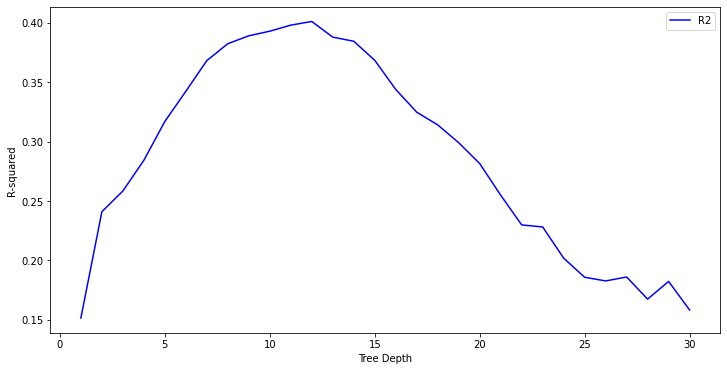

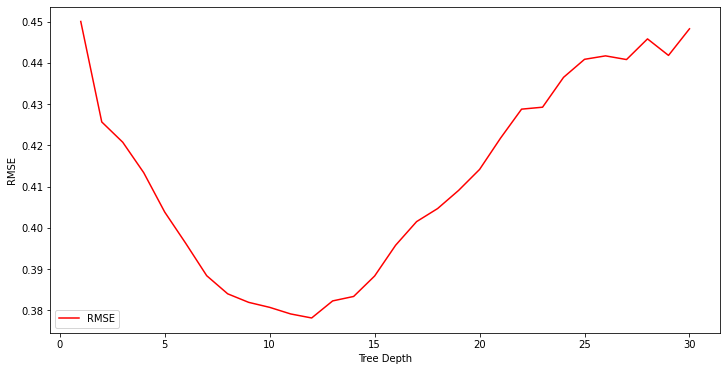

In [5]:
max_depths = np.linspace(1,30,30)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(random_state=45, max_depth=max_depth)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mse_results.append(rmse)
    r2_results.append(r2)
plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

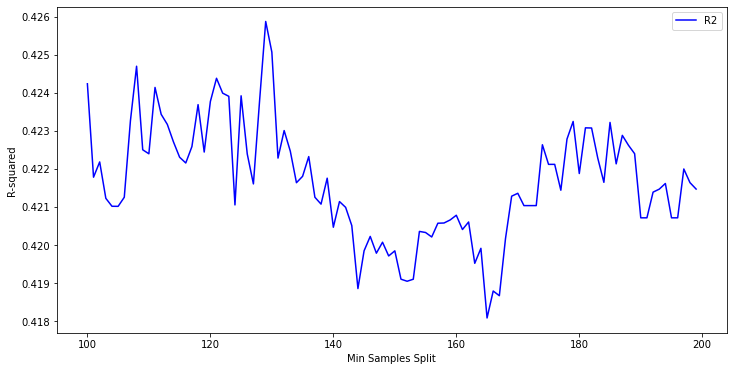

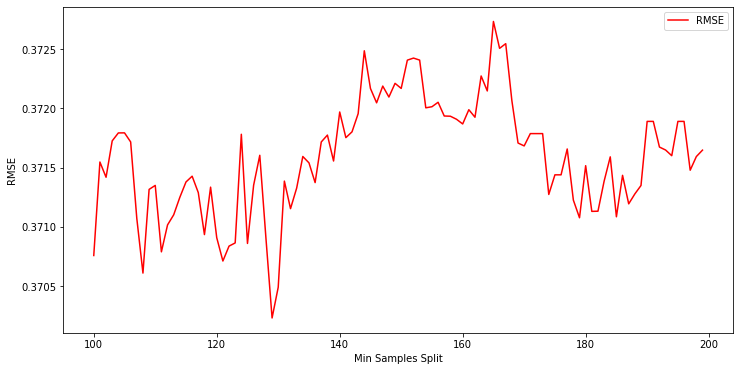

In [6]:
min_samples_splits = np.arange(100, 200)
mse_results = []
r2_results = []
for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(random_state=45, min_samples_split=min_samples_split)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mse_results.append(rmse)
    r2_results.append(r2)
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.xlabel('Min Samples Split')
plt.ylabel('RMSE')
plt.legend()
plt.show()